In [436]:
import pandas as pd
import numpy as np
import random


In [428]:
df = pd.read_csv("monday.csv", sep=";")

In [429]:
df

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [18]:
df[df["customer_no"] == 6]

,timestamp,customer_no,location
5,2019-09-02 07:04:00,6,spices
10,2019-09-02 07:05:00,6,dairy
62,2019-09-02 07:17:00,6,spices
71,2019-09-02 07:18:00,6,drinks
102,2019-09-02 07:25:00,6,spices
104,2019-09-02 07:26:00,6,dairy
117,2019-09-02 07:27:00,6,spices
135,2019-09-02 07:29:00,6,checkout


### Number of Customers in each Section

In [183]:
df[df["location"] == "spices"].count()

timestamp         750
customer_no       750
location          750
customer_count    750
dtype: int64

In [29]:
df[df["location"] == "dairy"].count()

timestamp      895
customer_no    895
location       895
dtype: int64

In [30]:
df[df["location"] == "drinks"].count()

timestamp      797
customer_no    797
location       797
dtype: int64

In [31]:
df[df["location"] == "fruit"].count()

timestamp      1005
customer_no    1005
location       1005
dtype: int64

In [32]:
df[df["location"] == "checkout"].count()

timestamp      1437
customer_no    1437
location       1437
dtype: int64

### Number of Customers in each Section over Time

In [115]:
df_spices = df[df["location"] == "spices"]

In [38]:
#df_spices = df_spices.set_index("timestamp")

In [138]:
def customer_over_time(df):
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    customer_list = df["customer_no"].tolist()
    customer_count = []
    for i in customer_list:  
        customer_count.append(1)
    df["customer_count"] = customer_count
    df = df[["timestamp", "customer_count"]]
    df_sum = df.groupby("timestamp").sum()
    
    return df_sum

In [116]:
df_spices = customer_over_time(df_spices)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [82]:
df_spices["timestamp"] = pd.to_datetime(df["timestamp"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
df_spices["timestamp"].dtypes

dtype('<M8[ns]')

In [84]:
customer_list = df_spices["customer_no"].tolist()

In [85]:
customer_count = []
for i in customer_list:
    customer_count.append(1)
    
    

In [86]:
df_spices["customer_count"] = customer_count

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
df_aggregate = df_spices[["timestamp", "customer_count"]]

In [102]:
df_spices_time = df_aggregate.groupby("timestamp").sum()

In [113]:
df_spices_time.head()

,customer_count
timestamp,
2019-09-02 07:04:00,3
2019-09-02 07:06:00,1
2019-09-02 07:07:00,1
2019-09-02 07:09:00,2
2019-09-02 07:12:00,1


### Spices over Time

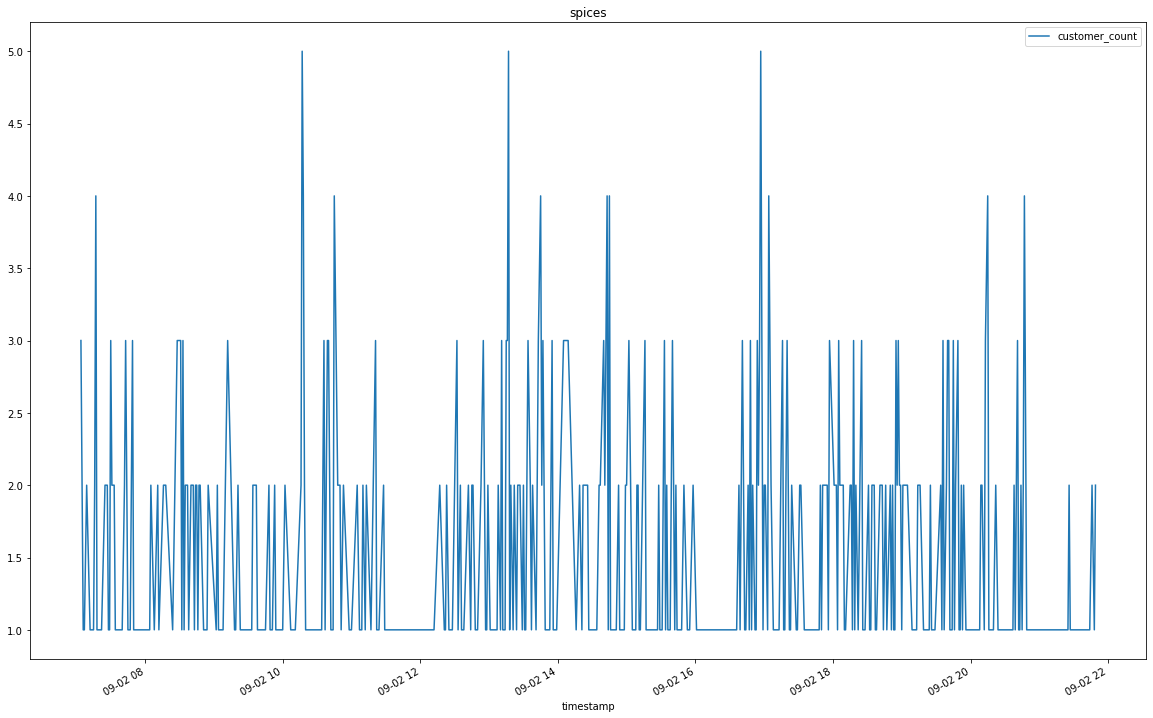

In [112]:
df_spices_time.plot(figsize=(20,13), title="spices")


### Fruits over Time

In [139]:
df_fruits = df[df["location"] == "fruit"]

In [140]:
df_fruits

,timestamp,customer_no,location,customer_count
7,2019-09-02 07:04:00,8,fruit,1
15,2019-09-02 07:06:00,10,fruit,1
19,2019-09-02 07:06:00,14,fruit,1
27,2019-09-02 07:08:00,15,fruit,1
32,2019-09-02 07:11:00,7,fruit,1
...,...,...,...,...
4866,2019-09-02 21:47:00,1442,fruit,1
4867,2019-09-02 21:47:00,1443,fruit,1
4875,2019-09-02 21:49:00,1430,fruit,1
4876,2019-09-02 21:49:00,1433,fruit,1


In [141]:
df_fruits_time = customer_over_time(df_fruits)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


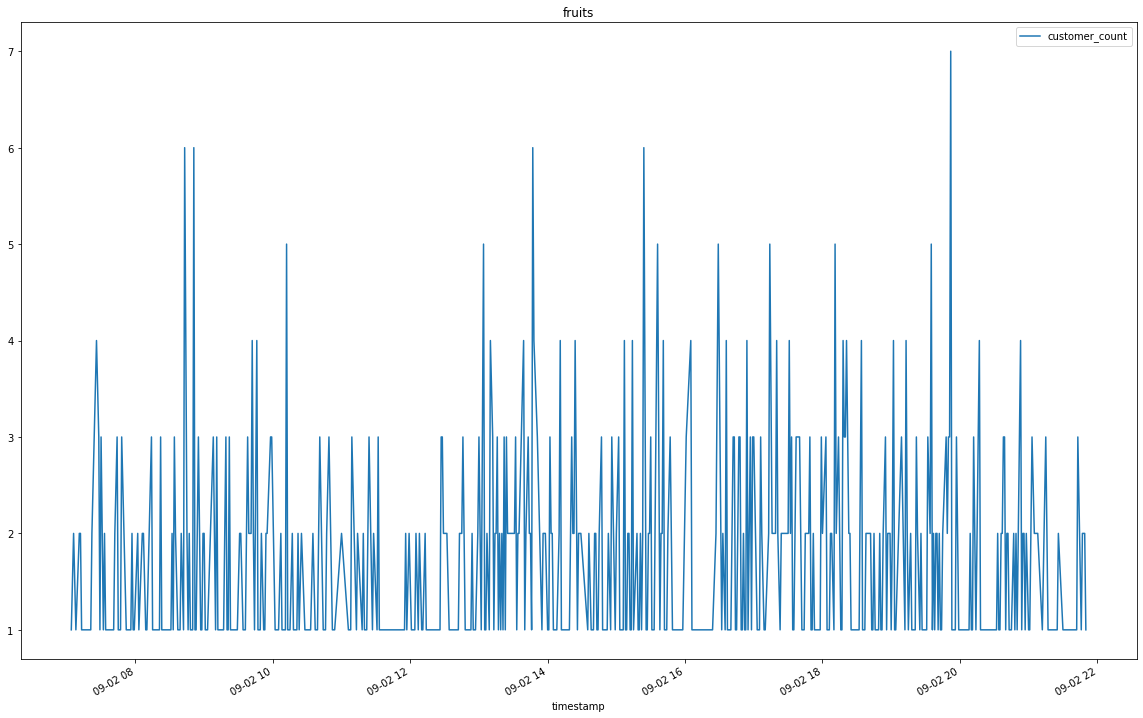

In [142]:
df_fruits_time.plot(figsize=(20,13), title="fruits")


### Dairy over Time

In [155]:
df_dairy = df[df["location"] == "dairy"]

In [156]:
df_dairy

,timestamp,customer_no,location,customer_count
0,2019-09-02 07:03:00,1,dairy,1
1,2019-09-02 07:03:00,2,dairy,1
2,2019-09-02 07:04:00,3,dairy,1
3,2019-09-02 07:04:00,4,dairy,1
10,2019-09-02 07:05:00,6,dairy,1
...,...,...,...,...
4865,2019-09-02 21:47:00,1441,dairy,1
4868,2019-09-02 21:48:00,1430,dairy,1
4873,2019-09-02 21:48:00,1443,dairy,1
4881,2019-09-02 21:49:00,1445,dairy,1


In [157]:
df_dairy_time = customer_over_time(df_dairy)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [158]:
df_dairy_time

,customer_count
timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,2
2019-09-02 07:05:00,1
2019-09-02 07:06:00,2
2019-09-02 07:07:00,1
...,...
2019-09-02 21:42:00,1
2019-09-02 21:47:00,2
2019-09-02 21:48:00,2


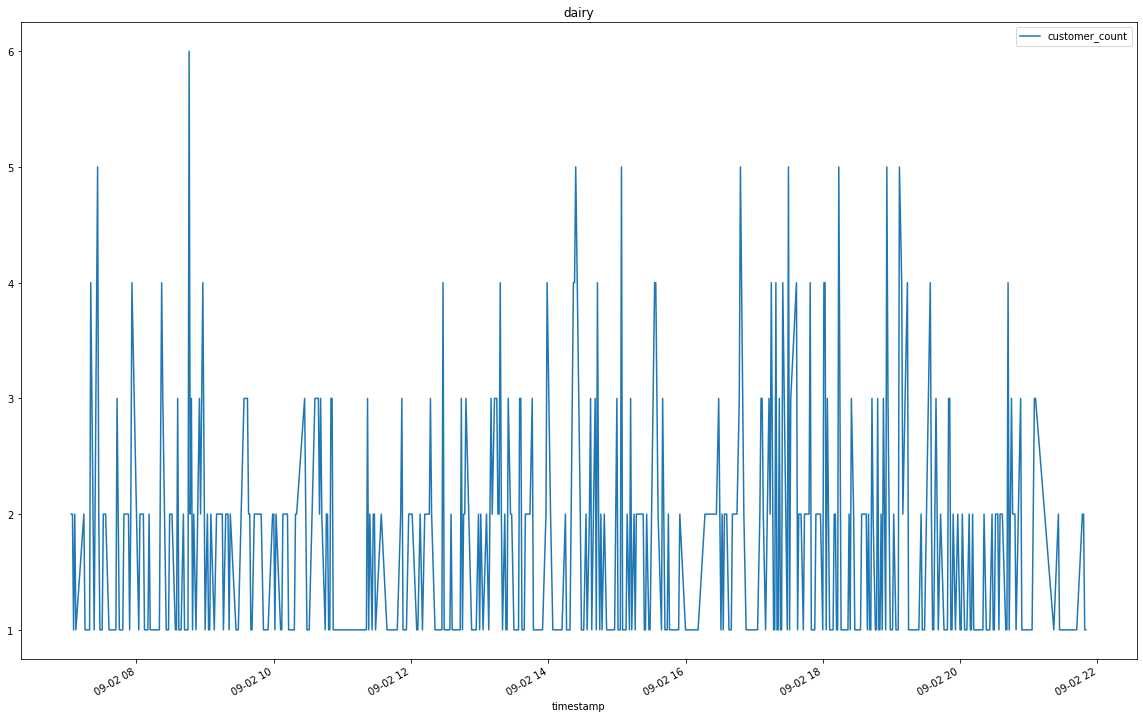

In [159]:
df_dairy_time.plot(figsize=(20,13), title="dairy")

### Drinks over Time

In [149]:
df_drinks = df[df["location"] == "drinks"]

In [150]:
df_drinks

,timestamp,customer_no,location,customer_count
11,2019-09-02 07:05:00,7,drinks,1
16,2019-09-02 07:06:00,11,drinks,1
21,2019-09-02 07:07:00,12,drinks,1
39,2019-09-02 07:12:00,20,drinks,1
43,2019-09-02 07:13:00,19,drinks,1
...,...,...,...,...
4852,2019-09-02 21:43:00,1436,drinks,1
4857,2019-09-02 21:46:00,1434,drinks,1
4861,2019-09-02 21:46:00,1440,drinks,1
4870,2019-09-02 21:48:00,1433,drinks,1


In [151]:
df_drinks_time = customer_over_time(df_drinks)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [153]:
df_drinks_time

,customer_count
timestamp,
2019-09-02 07:05:00,1
2019-09-02 07:06:00,1
2019-09-02 07:07:00,1
2019-09-02 07:12:00,1
2019-09-02 07:13:00,2
...,...
2019-09-02 21:34:00,1
2019-09-02 21:41:00,1
2019-09-02 21:43:00,2


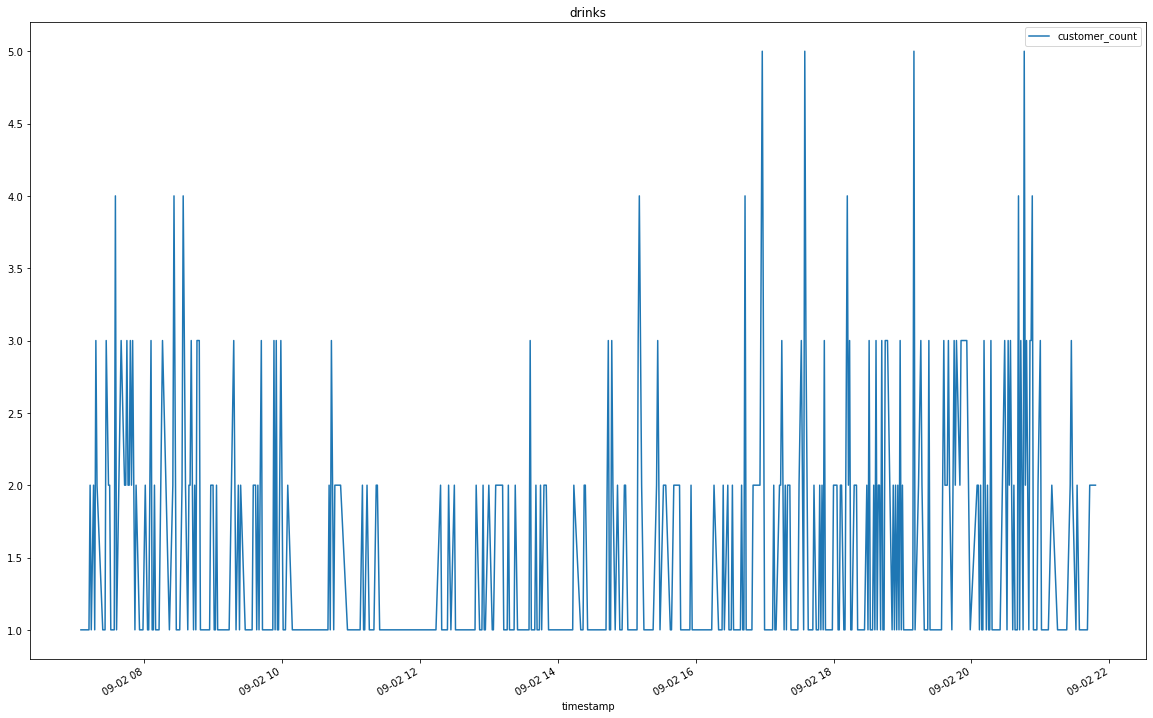

In [152]:
df_drinks_time.plot(figsize=(20,13), title="drinks")

### Checkout over Time 

In [160]:
df_checkout = df[df["location"] == "checkout"]

In [161]:
df_checkout

,timestamp,customer_no,location,customer_count
8,2019-09-02 07:05:00,1,checkout,1
9,2019-09-02 07:05:00,5,checkout,1
12,2019-09-02 07:06:00,2,checkout,1
13,2019-09-02 07:06:00,3,checkout,1
20,2019-09-02 07:07:00,8,checkout,1
...,...,...,...,...
4864,2019-09-02 21:47:00,1438,checkout,1
4869,2019-09-02 21:48:00,1431,checkout,1
4871,2019-09-02 21:48:00,1434,checkout,1
4879,2019-09-02 21:49:00,1442,checkout,1


In [162]:
df_checkout_time = customer_over_time(df_checkout)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [222]:
df_checkout_time

,customer_count
timestamp,
2019-09-02 07:05:00,2
2019-09-02 07:06:00,2
2019-09-02 07:07:00,1
2019-09-02 07:08:00,3
2019-09-02 07:09:00,1
...,...
2019-09-02 21:44:00,1
2019-09-02 21:46:00,1
2019-09-02 21:47:00,2


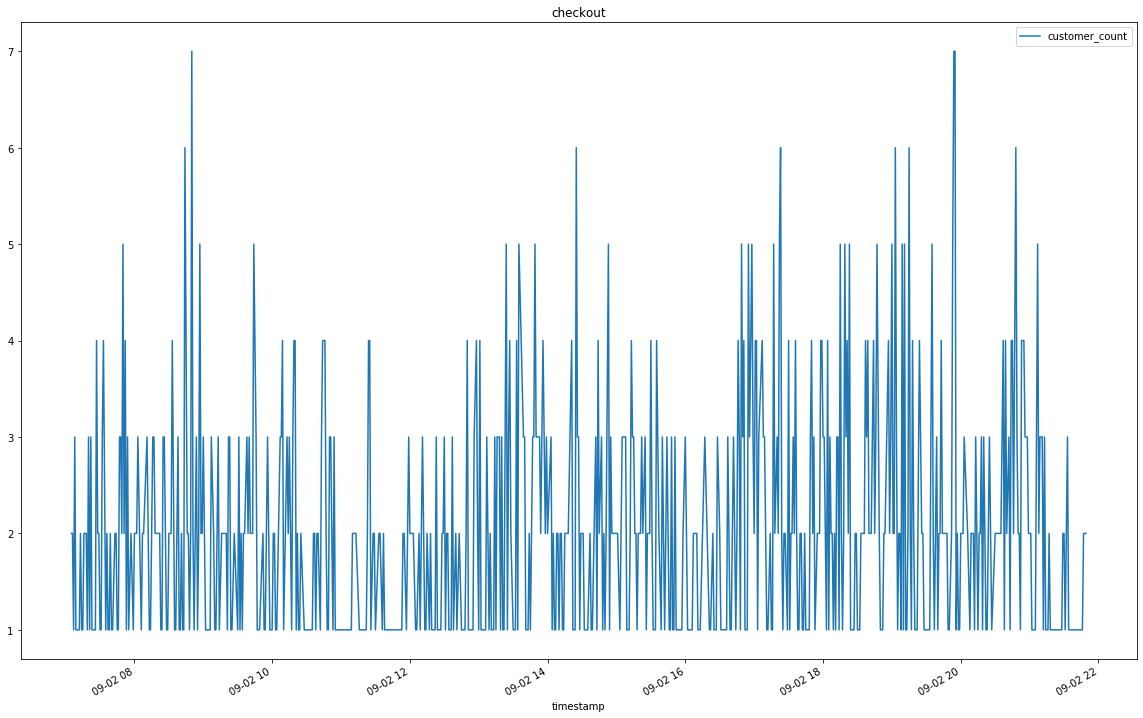

In [163]:
df_checkout_time.plot(figsize=(20,13), title="checkout")

### Time each Customer spent in the Market

In [443]:
#df.head()

In [444]:
#df[df["customer_no"] == 1]

In [ ]:
#t2 = 

In [ ]:
#pd.Timedelta(t2 - t1).seconds / 60.0

### Calculate the total Number of Customers in the supermarket over time

In [187]:
df["customer_no"].nunique()

1447

In [202]:
df.head(20)

,timestamp,customer_no,location,customer_count
0,2019-09-02 07:03:00,1,dairy,1
1,2019-09-02 07:03:00,2,dairy,1
2,2019-09-02 07:04:00,3,dairy,1
3,2019-09-02 07:04:00,4,dairy,1
4,2019-09-02 07:04:00,5,spices,1
5,2019-09-02 07:04:00,6,spices,1
6,2019-09-02 07:04:00,7,spices,1
7,2019-09-02 07:04:00,8,fruit,1
8,2019-09-02 07:05:00,1,checkout,1
9,2019-09-02 07:05:00,5,checkout,1


In [197]:
test = df.groupby(["timestamp", "customer_no"]).sum()

In [201]:
test.head(20)

customer_count
timestamp           customer_no                
2019-09-02 07:03:00 1                         1
                    2                         1
2019-09-02 07:04:00 3                         1
                    4                         1
                    5                         1
                    6                         1
                    7                         1
                    8                         1
2019-09-02 07:05:00 1                         1
                    5                         1
                    6                         1
                    7                         1
2019-09-02 07:06:00 2                         1
                    3                         1
                    9                         1
                    10                        1
                    11                        1
                    12                        1
                    13                        1
                    14                        1

In [256]:
def customer_count_total(df):

    list = []
    customer_count = []
    customer_list = df["customer_no"].tolist()

    for i in customer_list:

        if i in list:
            customer_count.append(0)

        else:
            customer_count.append(1)

        list.append(i)
        
    df["customer_count"] = customer_count
    
    df["hour"] = pd.to_datetime(df["timestamp"]).dt.hour
    
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    
    df = df[["timestamp", "customer_count"]]
    df_sum = df.groupby("timestamp").sum()
    
    return df_sum

In [257]:
df_new = customer_count_total(df)

In [258]:
df_new

,customer_count
timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,6
2019-09-02 07:05:00,0
2019-09-02 07:06:00,6
2019-09-02 07:07:00,2
...,...
2019-09-02 21:46:00,3
2019-09-02 21:47:00,3
2019-09-02 21:48:00,1


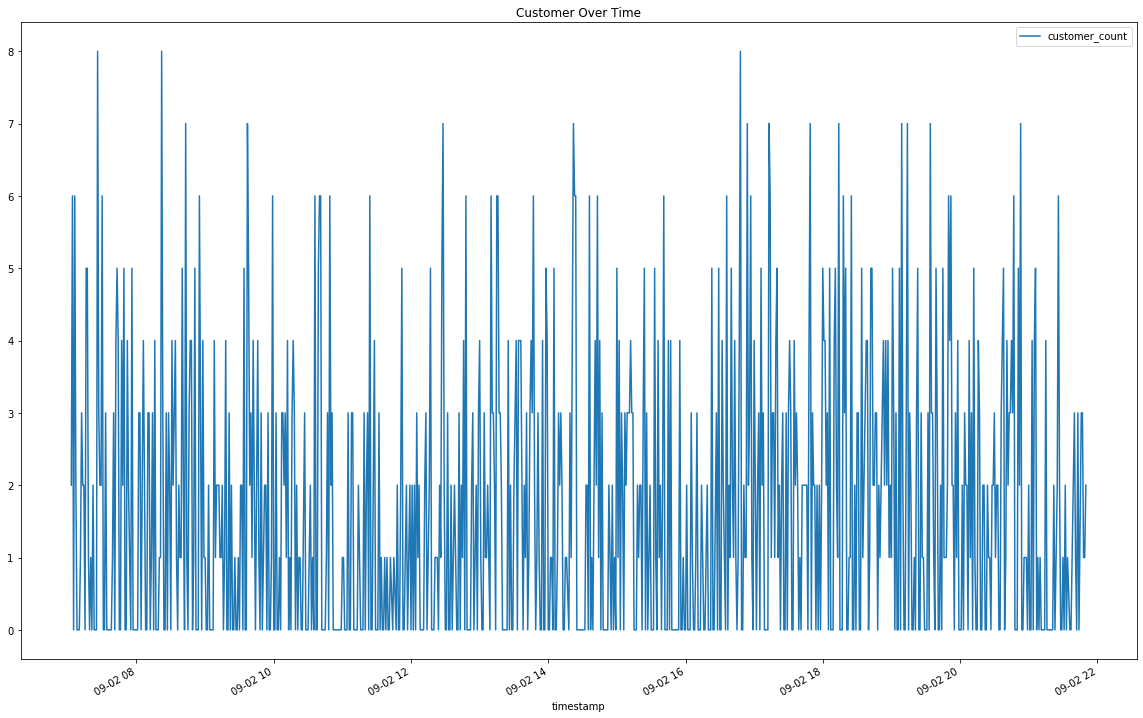

In [259]:
df_new.plot(figsize=(20,13), title="Customer Over Time")

### Estimate Revenue

### Transitions

In [ ]:
# fruits spices diary drinks checkout

In [371]:
df

,timestamp,customer_no,location,dates
0,2019-09-02 07:03:00,1,dairy,2019-09-02 07:03:00
1,2019-09-02 07:03:00,2,dairy,2019-09-02 07:03:00
2,2019-09-02 07:04:00,3,dairy,2019-09-02 07:04:00
3,2019-09-02 07:04:00,4,dairy,2019-09-02 07:04:00
4,2019-09-02 07:04:00,5,spices,2019-09-02 07:04:00
...,...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout,2019-09-02 21:49:00
4880,2019-09-02 21:49:00,1444,checkout,2019-09-02 21:49:00
4881,2019-09-02 21:49:00,1445,dairy,2019-09-02 21:49:00
4882,2019-09-02 21:50:00,1446,dairy,2019-09-02 21:50:00


### Transition Function

In [434]:
def transition_matrix(df):
    list = []
    dictionary = {"before": [],
                   "after": []}
    for row in df["customer_no"]:
        if row in list:
            continue
        customer = df[df["customer_no"] == row] #Create DataFrame for individuel Customer

        customer["timestamp"]= pd.to_datetime(customer["timestamp"]) #timestamp -> index
        customer = customer.set_index("timestamp")                   #r.resample(rule="min").ffill()
        customer = customer.resample(rule="Min").asfreq()
        customer = customer.ffill()
        
        
        
        location_list_before = customer["location"].tolist()
        location_list_before = location_list_before[:-1] #Takes out "Checkout" because its the last state
        
        location_list_after = customer["location"].tolist()
        location_list_after = location_list_after[1:] #Takes "Checkout" in consideration but starts at second
                                                      #Element because its the "afterlist"
        for word in location_list_before:
            dictionary["before"].append(word)
        for word in location_list_after:
            dictionary["after"].append(word)
        
        list.append(row)

    return dictionary

        

In [431]:
d = transition_matrix(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 07:03:00          1.0     dairy
2019-09-02 07:04:00          1.0     dairy
2019-09-02 07:05:00          1.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 07:03:00          2.0     dairy
2019-09-02 07:04:00          2.0     dairy
2019-09-02 07:05:00          2.0     dairy
2019-09-02 07:06:00          2.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 07:04:00          3.0     dairy
2019-09-02 07:05:00          3.0     dairy
2019-09-02 07:06:00          3.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 07:04:00          4.0     dairy
2019-09-02 07:05:00          4.0     dairy
2019-09-02 07:06:00          4.0     dairy
2019-09-02 07:07:00          4.0     dairy
2019-09-02 07:08:00          4.0  checkout
           

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 07:12:00         19.0    spices
2019-09-02 07:13:00         19.0    drinks
2019-09-02 07:14:00         19.0    drinks
2019-09-02 07:15:00         19.0    drinks
2019-09-02 07:16:00         19.0    drinks
2019-09-02 07:17:00         19.0    drinks
2019-09-02 07:18:00         19.0    drinks
2019-09-02 07:19:00         19.0    drinks
2019-09-02 07:20:00         19.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 07:12:00         20.0    drinks
2019-09-02 07:13:00         20.0    drinks
2019-09-02 07:14:00         20.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 07:13:00         21.0    drinks
2019-09-02 07:14:00         21.0    drinks
2019-09-02 07:15:00         21.0    spices
2019-09-02 07:16:00         21.0  checkout
                     customer_no  location
timestamp  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 07:26:00         45.0    spices
2019-09-02 07:27:00         45.0     dairy
2019-09-02 07:28:00         45.0     dairy
2019-09-02 07:29:00         45.0     dairy
2019-09-02 07:30:00         45.0     fruit
2019-09-02 07:31:00         45.0    drinks
2019-09-02 07:32:00         45.0    drinks
2019-09-02 07:33:00         45.0    drinks
2019-09-02 07:34:00         45.0     fruit
2019-09-02 07:35:00         45.0     fruit
2019-09-02 07:36:00         45.0     dairy
2019-09-02 07:37:00         45.0     dairy
2019-09-02 07:38:00         45.0     dairy
2019-09-02 07:39:00         45.0     dairy
2019-09-02 07:40:00         45.0     dairy
2019-09-02 07:41:00         45.0     dairy
2019-09-02 07:42:00         45.0     dairy
2019-09-02 07:43:00         45.0     dairy
2019-09-02 07:44:00         45.0     dairy
2019-09-02 07:45:00         45.0     dairy
2019-09-02 07:46:00         45.0     dairy
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 07:42:00         70.0    spices
2019-09-02 07:43:00         70.0    spices
2019-09-02 07:44:00         70.0    drinks
2019-09-02 07:45:00         70.0    drinks
2019-09-02 07:46:00         70.0    drinks
2019-09-02 07:47:00         70.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 07:43:00         71.0     dairy
2019-09-02 07:44:00         71.0     fruit
2019-09-02 07:45:00         71.0     fruit
2019-09-02 07:46:00         71.0     fruit
2019-09-02 07:47:00         71.0     fruit
2019-09-02 07:48:00         71.0     fruit
2019-09-02 07:49:00         71.0     fruit
2019-09-02 07:50:00         71.0     fruit
2019-09-02 07:51:00         71.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 07:43:00         72.0    spices
2019-09-02 07:44:00         72.0    spices
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 07:53:00         95.0    drinks
2019-09-02 07:54:00         95.0    drinks
2019-09-02 07:55:00         95.0    drinks
2019-09-02 07:56:00         95.0    drinks
2019-09-02 07:57:00         95.0     fruit
2019-09-02 07:58:00         95.0     fruit
2019-09-02 07:59:00         95.0     fruit
2019-09-02 08:00:00         95.0     fruit
2019-09-02 08:01:00         95.0     fruit
2019-09-02 08:02:00         95.0    spices
2019-09-02 08:03:00         95.0     dairy
2019-09-02 08:04:00         95.0     dairy
2019-09-02 08:05:00         95.0     dairy
2019-09-02 08:06:00         95.0     dairy
2019-09-02 08:07:00         95.0     dairy
2019-09-02 08:08:00         95.0     dairy
2019-09-02 08:09:00         95.0     dairy
2019-09-02 08:10:00         95.0     dairy
2019-09-02 08:11:00         95.0     dairy
2019-09-02 08:12:00         95.0     dairy
2019-09-02 08:13:00         95.0     dairy
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 08:07:00        115.0     fruit
2019-09-02 08:08:00        115.0     fruit
2019-09-02 08:09:00        115.0     fruit
2019-09-02 08:10:00        115.0     fruit
2019-09-02 08:11:00        115.0     fruit
2019-09-02 08:12:00        115.0     fruit
2019-09-02 08:13:00        115.0     fruit
2019-09-02 08:14:00        115.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 08:07:00          116    drinks
2019-09-02 08:08:00          116  checkout
                     customer_no  location
timestamp                                 
2019-09-02 08:10:00        117.0     dairy
2019-09-02 08:11:00        117.0     dairy
2019-09-02 08:12:00        117.0    spices
2019-09-02 08:13:00        117.0    spices
2019-09-02 08:14:00        117.0    spices
2019-09-02 08:15:00        117.0    spices
2019-09-02 08:16:00        117.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 08:22:00        135.0     dairy
2019-09-02 08:23:00        135.0     dairy
2019-09-02 08:24:00        135.0     dairy
2019-09-02 08:25:00        135.0     dairy
2019-09-02 08:26:00        135.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 08:22:00        136.0     dairy
2019-09-02 08:23:00        136.0     dairy
2019-09-02 08:24:00        136.0     dairy
2019-09-02 08:25:00        136.0     dairy
2019-09-02 08:26:00        136.0    drinks
2019-09-02 08:27:00        136.0     fruit
2019-09-02 08:28:00        136.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 08:22:00        137.0     fruit
2019-09-02 08:23:00        137.0     fruit
2019-09-02 08:24:00        137.0     fruit
2019-09-02 08:25:00        137.0     fruit
2019-09-02 08:26:00        137.0  checkout
           

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 08:31:00        152.0     fruit
2019-09-02 08:32:00        152.0     fruit
2019-09-02 08:33:00        152.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 08:31:00        153.0     dairy
2019-09-02 08:32:00        153.0     dairy
2019-09-02 08:33:00        153.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 08:31:00        154.0     dairy
2019-09-02 08:32:00        154.0     dairy
2019-09-02 08:33:00        154.0    spices
2019-09-02 08:34:00        154.0    spices
2019-09-02 08:35:00        154.0    spices
2019-09-02 08:36:00        154.0    drinks
2019-09-02 08:37:00        154.0    drinks
2019-09-02 08:38:00        154.0     fruit
2019-09-02 08:39:00        154.0     fruit
2019-09-02 08:40:00        154.0     fruit
2019-09-02 08:41:00        154.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 08:41:00          175    drinks
2019-09-02 08:42:00          175  checkout
                     customer_no  location
timestamp                                 
2019-09-02 08:41:00        176.0    drinks
2019-09-02 08:42:00        176.0     fruit
2019-09-02 08:43:00        176.0     fruit
2019-09-02 08:44:00        176.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 08:43:00        177.0     fruit
2019-09-02 08:44:00        177.0     fruit
2019-09-02 08:45:00        177.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 08:43:00        178.0     fruit
2019-09-02 08:44:00        178.0     fruit
2019-09-02 08:45:00        178.0     fruit
2019-09-02 08:46:00        178.0    drinks
2019-09-02 08:47:00        178.0    drinks
2019-09-02 08:48:00        178.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 08:51:00        199.0     fruit
2019-09-02 08:52:00        199.0     fruit
2019-09-02 08:53:00        199.0     fruit
2019-09-02 08:54:00        199.0     fruit
2019-09-02 08:55:00        199.0     dairy
2019-09-02 08:56:00        199.0     dairy
2019-09-02 08:57:00        199.0     dairy
2019-09-02 08:58:00        199.0     dairy
2019-09-02 08:59:00        199.0     fruit
2019-09-02 09:00:00        199.0     fruit
2019-09-02 09:01:00        199.0     fruit
2019-09-02 09:02:00        199.0    spices
2019-09-02 09:03:00        199.0    drinks
2019-09-02 09:04:00        199.0    drinks
2019-09-02 09:05:00        199.0    drinks
2019-09-02 09:06:00        199.0    spices
2019-09-02 09:07:00        199.0    spices
2019-09-02 09:08:00        199.0    spices
2019-09-02 09:09:00        199.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 09:03:00        218.0     fruit
2019-09-02 09:04:00        218.0     fruit
2019-09-02 09:05:00        218.0     fruit
2019-09-02 09:06:00        218.0     fruit
2019-09-02 09:07:00        218.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 09:08:00        219.0     fruit
2019-09-02 09:09:00        219.0     fruit
2019-09-02 09:10:00        219.0     dairy
2019-09-02 09:11:00        219.0     dairy
2019-09-02 09:12:00        219.0     dairy
2019-09-02 09:13:00        219.0     dairy
2019-09-02 09:14:00        219.0     dairy
2019-09-02 09:15:00        219.0     dairy
2019-09-02 09:16:00        219.0     dairy
2019-09-02 09:17:00        219.0     dairy
2019-09-02 09:18:00        219.0     dairy
2019-09-02 09:19:00        219.0     dairy
2019-09-02 09:20:00        219.0     dairy
2019-09-02 09:21:00        219.0     dairy
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro


                     customer_no  location
timestamp                                 
2019-09-02 09:18:00        237.0    spices
2019-09-02 09:19:00        237.0    spices
2019-09-02 09:20:00        237.0    drinks
2019-09-02 09:21:00        237.0    drinks
2019-09-02 09:22:00        237.0     fruit
2019-09-02 09:23:00        237.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 09:18:00        238.0     dairy
2019-09-02 09:19:00        238.0     fruit
2019-09-02 09:20:00        238.0     fruit
2019-09-02 09:21:00        238.0     fruit
2019-09-02 09:22:00        238.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 09:21:00          239     fruit
2019-09-02 09:22:00          239  checkout
                     customer_no  location
timestamp                                 
2019-09-02 09:21:00          240    spices
2019-09-02 09:22:00          240    drinks
2019-09-02

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 09:37:00        258.0    spices
2019-09-02 09:38:00        258.0    spices
2019-09-02 09:39:00        258.0    spices
2019-09-02 09:40:00        258.0    spices
2019-09-02 09:41:00        258.0     dairy
2019-09-02 09:42:00        258.0    spices
2019-09-02 09:43:00        258.0    spices
2019-09-02 09:44:00        258.0    spices
2019-09-02 09:45:00        258.0    spices
2019-09-02 09:46:00        258.0     dairy
2019-09-02 09:47:00        258.0     dairy
2019-09-02 09:48:00        258.0     dairy
2019-09-02 09:49:00        258.0     dairy
2019-09-02 09:50:00        258.0     fruit
2019-09-02 09:51:00        258.0     dairy
2019-09-02 09:52:00        258.0     dairy
2019-09-02 09:53:00        258.0    drinks
2019-09-02 09:54:00        258.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 09:37:00          259    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 09:42:00        275.0     fruit
2019-09-02 09:43:00        275.0     dairy
2019-09-02 09:44:00        275.0     dairy
2019-09-02 09:45:00        275.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 09:42:00          276     fruit
2019-09-02 09:43:00          276  checkout
                     customer_no  location
timestamp                                 
2019-09-02 09:43:00        277.0     fruit
2019-09-02 09:44:00        277.0     fruit
2019-09-02 09:45:00        277.0     fruit
2019-09-02 09:46:00        277.0     fruit
2019-09-02 09:47:00        277.0     fruit
2019-09-02 09:48:00        277.0     fruit
2019-09-02 09:49:00        277.0     dairy
2019-09-02 09:50:00        277.0     dairy
2019-09-02 09:51:00        277.0     dairy
2019-09-02 09:52:00        277.0    drinks
2019-09-02 09:53:00        277.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 09:52:00        290.0     dairy
2019-09-02 09:53:00        290.0     dairy
2019-09-02 09:54:00        290.0     dairy
2019-09-02 09:55:00        290.0     dairy
2019-09-02 09:56:00        290.0     dairy
2019-09-02 09:57:00        290.0     dairy
2019-09-02 09:58:00        290.0     dairy
2019-09-02 09:59:00        290.0    drinks
2019-09-02 10:00:00        290.0    drinks
2019-09-02 10:01:00        290.0    drinks
2019-09-02 10:02:00        290.0    drinks
2019-09-02 10:03:00        290.0    drinks
2019-09-02 10:04:00        290.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 09:52:00          291     fruit
2019-09-02 09:53:00          291     dairy
2019-09-02 09:54:00          291     fruit
2019-09-02 09:55:00          291  checkout
                     customer_no  location
timestamp                                 
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 10:05:00        307.0     fruit
2019-09-02 10:06:00        307.0     fruit
2019-09-02 10:07:00        307.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 10:07:00          308     fruit
2019-09-02 10:08:00          308  checkout
                     customer_no  location
timestamp                                 
2019-09-02 10:07:00          309    spices
2019-09-02 10:08:00          309  checkout
                     customer_no  location
timestamp                                 
2019-09-02 10:07:00        310.0     dairy
2019-09-02 10:08:00        310.0     dairy
2019-09-02 10:09:00        310.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 10:08:00          311     fruit
2019-09-02 10:09:00          311  checkout
                     customer_no  location
timestamp  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 10:16:00        325.0    spices
2019-09-02 10:17:00        325.0    spices
2019-09-02 10:18:00        325.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 10:16:00          326     dairy
2019-09-02 10:17:00          326  checkout
                     customer_no  location
timestamp                                 
2019-09-02 10:16:00        327.0    drinks
2019-09-02 10:17:00        327.0     fruit
2019-09-02 10:18:00        327.0     fruit
2019-09-02 10:19:00        327.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 10:17:00        328.0    spices
2019-09-02 10:18:00        328.0    spices
2019-09-02 10:19:00        328.0     dairy
2019-09-02 10:20:00        328.0     dairy
2019-09-02 10:21:00        328.0     dairy
2019-09-02 10:22:00        328.0     dairy
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 10:36:00        346.0    spices
2019-09-02 10:37:00        346.0    spices
2019-09-02 10:38:00        346.0    spices
2019-09-02 10:39:00        346.0     dairy
2019-09-02 10:40:00        346.0     dairy
2019-09-02 10:41:00        346.0     dairy
2019-09-02 10:42:00        346.0     dairy
2019-09-02 10:43:00        346.0     dairy
2019-09-02 10:44:00        346.0     dairy
2019-09-02 10:45:00        346.0     dairy
2019-09-02 10:46:00        346.0     fruit
2019-09-02 10:47:00        346.0     fruit
2019-09-02 10:48:00        346.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 10:36:00          347     dairy
2019-09-02 10:37:00          347  checkout
                     customer_no  location
timestamp                                 
2019-09-02 10:36:00        348.0    spices
2019-09-02 10:37:00        348.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro


                     customer_no  location
timestamp                                 
2019-09-02 10:47:00        370.0     fruit
2019-09-02 10:48:00        370.0     fruit
2019-09-02 10:49:00        370.0     fruit
2019-09-02 10:50:00        370.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 10:47:00        371.0     dairy
2019-09-02 10:48:00        371.0     dairy
2019-09-02 10:49:00        371.0     dairy
2019-09-02 10:50:00        371.0     dairy
2019-09-02 10:51:00        371.0     dairy
2019-09-02 10:52:00        371.0     dairy
2019-09-02 10:53:00        371.0     dairy
2019-09-02 10:54:00        371.0     dairy
2019-09-02 10:55:00        371.0     dairy
2019-09-02 10:56:00        371.0     dairy
2019-09-02 10:57:00        371.0     dairy
2019-09-02 10:58:00        371.0     dairy
2019-09-02 10:59:00        371.0     dairy
2019-09-02 11:00:00        371.0     dairy
2019-09-02 11:01:00        371.0     dairy
2019-09-02

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro


                     customer_no  location
timestamp                                 
2019-09-02 11:09:00        392.0     fruit
2019-09-02 11:10:00        392.0    spices
2019-09-02 11:11:00        392.0    spices
2019-09-02 11:12:00        392.0    spices
2019-09-02 11:13:00        392.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 11:09:00          393     fruit
2019-09-02 11:10:00          393  checkout
                     customer_no  location
timestamp                                 
2019-09-02 11:09:00        394.0     fruit
2019-09-02 11:10:00        394.0     fruit
2019-09-02 11:11:00        394.0     fruit
2019-09-02 11:12:00        394.0     fruit
2019-09-02 11:13:00        394.0    spices
2019-09-02 11:14:00        394.0     fruit
2019-09-02 11:15:00        394.0     fruit
2019-09-02 11:16:00        394.0    drinks
2019-09-02 11:17:00        394.0    drinks
2019-09-02 11:18:00        394.0    drinks
2019-09-02

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 11:24:00          408     fruit
2019-09-02 11:25:00          408  checkout
                     customer_no  location
timestamp                                 
2019-09-02 11:24:00        409.0     dairy
2019-09-02 11:25:00        409.0     dairy
2019-09-02 11:26:00        409.0     dairy
2019-09-02 11:27:00        409.0     dairy
2019-09-02 11:28:00        409.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 11:24:00        410.0     fruit
2019-09-02 11:25:00        410.0     fruit
2019-09-02 11:26:00        410.0     fruit
2019-09-02 11:27:00        410.0     fruit
2019-09-02 11:28:00        410.0    drinks
2019-09-02 11:29:00        410.0    drinks
2019-09-02 11:30:00        410.0    drinks
2019-09-02 11:31:00        410.0    drinks
2019-09-02 11:32:00        410.0    spices
2019-09-02 11:33:00        410.0    spices
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 11:48:00        425.0     dairy
2019-09-02 11:49:00        425.0     dairy
2019-09-02 11:50:00        425.0     fruit
2019-09-02 11:51:00        425.0     fruit
2019-09-02 11:52:00        425.0     fruit
2019-09-02 11:53:00        425.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 11:48:00        426.0     fruit
2019-09-02 11:49:00        426.0     fruit
2019-09-02 11:50:00        426.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 11:51:00          427     dairy
2019-09-02 11:52:00          427  checkout
                     customer_no  location
timestamp                                 
2019-09-02 11:51:00        428.0     dairy
2019-09-02 11:52:00        428.0     dairy
2019-09-02 11:53:00        428.0     dairy
2019-09-02 11:54:00        428.0  checkout
           

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 12:03:00        443.0     fruit
2019-09-02 12:04:00        443.0     fruit
2019-09-02 12:05:00        443.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 12:05:00          444     fruit
2019-09-02 12:06:00          444  checkout
                     customer_no  location
timestamp                                 
2019-09-02 12:05:00        445.0     fruit
2019-09-02 12:06:00        445.0    drinks
2019-09-02 12:07:00        445.0    spices
2019-09-02 12:08:00        445.0     dairy
2019-09-02 12:09:00        445.0     dairy
2019-09-02 12:10:00        445.0     dairy
2019-09-02 12:11:00        445.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 12:05:00        446.0     dairy
2019-09-02 12:06:00        446.0     dairy
2019-09-02 12:07:00        446.0     dairy
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro


                     customer_no  location
timestamp                                 
2019-09-02 12:17:00        461.0     dairy
2019-09-02 12:18:00        461.0     dairy
2019-09-02 12:19:00        461.0     dairy
2019-09-02 12:20:00        461.0    drinks
2019-09-02 12:21:00        461.0    drinks
2019-09-02 12:22:00        461.0    spices
2019-09-02 12:23:00        461.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 12:17:00        462.0    spices
2019-09-02 12:18:00        462.0    spices
2019-09-02 12:19:00        462.0    spices
2019-09-02 12:20:00        462.0     fruit
2019-09-02 12:21:00        462.0    spices
2019-09-02 12:22:00        462.0     dairy
2019-09-02 12:23:00        462.0     dairy
2019-09-02 12:24:00        462.0     dairy
2019-09-02 12:25:00        462.0    drinks
2019-09-02 12:26:00        462.0    drinks
2019-09-02 12:27:00        462.0    drinks
2019-09-02 12:28:00        462.0    drinks
2019-09-02

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 12:28:00        478.0     fruit
2019-09-02 12:29:00        478.0     fruit
2019-09-02 12:30:00        478.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 12:28:00          479     fruit
2019-09-02 12:29:00          479  checkout
                     customer_no  location
timestamp                                 
2019-09-02 12:28:00        480.0     fruit
2019-09-02 12:29:00        480.0     fruit
2019-09-02 12:30:00        480.0     fruit
2019-09-02 12:31:00        480.0     fruit
2019-09-02 12:32:00        480.0     fruit
2019-09-02 12:33:00        480.0     fruit
2019-09-02 12:34:00        480.0     fruit
2019-09-02 12:35:00        480.0     fruit
2019-09-02 12:36:00        480.0     dairy
2019-09-02 12:37:00        480.0     dairy
2019-09-02 12:38:00        480.0     dairy
2019-09-02 12:39:00        480.0     fruit
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 12:42:00          494    drinks
2019-09-02 12:43:00          494  checkout
                     customer_no  location
timestamp                                 
2019-09-02 12:44:00        495.0     dairy
2019-09-02 12:45:00        495.0     dairy
2019-09-02 12:46:00        495.0     dairy
2019-09-02 12:47:00        495.0     dairy
2019-09-02 12:48:00        495.0     dairy
2019-09-02 12:49:00        495.0     dairy
2019-09-02 12:50:00        495.0     dairy
2019-09-02 12:51:00        495.0     dairy
2019-09-02 12:52:00        495.0     dairy
2019-09-02 12:53:00        495.0    spices
2019-09-02 12:54:00        495.0    spices
2019-09-02 12:55:00        495.0    drinks
2019-09-02 12:56:00        495.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 12:44:00        496.0     dairy
2019-09-02 12:45:00        496.0     dairy
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 12:54:00        512.0     fruit
2019-09-02 12:55:00        512.0    spices
2019-09-02 12:56:00        512.0     dairy
2019-09-02 12:57:00        512.0     dairy
2019-09-02 12:58:00        512.0     dairy
2019-09-02 12:59:00        512.0     dairy
2019-09-02 13:00:00        512.0     dairy
2019-09-02 13:01:00        512.0     dairy
2019-09-02 13:02:00        512.0     dairy
2019-09-02 13:03:00        512.0     dairy
2019-09-02 13:04:00        512.0     dairy
2019-09-02 13:05:00        512.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 12:56:00        513.0    spices
2019-09-02 12:57:00        513.0     dairy
2019-09-02 12:58:00        513.0     dairy
2019-09-02 12:59:00        513.0     dairy
2019-09-02 13:00:00        513.0     dairy
2019-09-02 13:01:00        513.0  checkout
                     customer_no  location
timestamp  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 13:07:00        529.0     fruit
2019-09-02 13:08:00        529.0     fruit
2019-09-02 13:09:00        529.0     fruit
2019-09-02 13:10:00        529.0     fruit
2019-09-02 13:11:00        529.0     fruit
2019-09-02 13:12:00        529.0     fruit
2019-09-02 13:13:00        529.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 13:07:00        530.0     fruit
2019-09-02 13:08:00        530.0     fruit
2019-09-02 13:09:00        530.0     fruit
2019-09-02 13:10:00        530.0     fruit
2019-09-02 13:11:00        530.0     fruit
2019-09-02 13:12:00        530.0     fruit
2019-09-02 13:13:00        530.0     fruit
2019-09-02 13:14:00        530.0     fruit
2019-09-02 13:15:00        530.0     fruit
2019-09-02 13:16:00        530.0     fruit
2019-09-02 13:17:00        530.0     fruit
2019-09-02 13:18:00        530.0     fruit
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 13:13:00        545.0     dairy
2019-09-02 13:14:00        545.0     fruit
2019-09-02 13:15:00        545.0     fruit
2019-09-02 13:16:00        545.0     fruit
2019-09-02 13:17:00        545.0     fruit
2019-09-02 13:18:00        545.0     fruit
2019-09-02 13:19:00        545.0     fruit
2019-09-02 13:20:00        545.0     fruit
2019-09-02 13:21:00        545.0     fruit
2019-09-02 13:22:00        545.0     fruit
2019-09-02 13:23:00        545.0     fruit
2019-09-02 13:24:00        545.0     dairy
2019-09-02 13:25:00        545.0    spices
2019-09-02 13:26:00        545.0    spices
2019-09-02 13:27:00        545.0     fruit
2019-09-02 13:28:00        545.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 13:15:00        546.0     fruit
2019-09-02 13:16:00        546.0     fruit
2019-09-02 13:17:00        546.0  checkout
           

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 13:17:00        559.0    spices
2019-09-02 13:18:00        559.0    spices
2019-09-02 13:19:00        559.0    spices
2019-09-02 13:20:00        559.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 13:17:00        560.0    spices
2019-09-02 13:18:00        560.0     dairy
2019-09-02 13:19:00        560.0     dairy
2019-09-02 13:20:00        560.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 13:18:00        561.0    drinks
2019-09-02 13:19:00        561.0    drinks
2019-09-02 13:20:00        561.0    drinks
2019-09-02 13:21:00        561.0    drinks
2019-09-02 13:22:00        561.0    drinks
2019-09-02 13:23:00        561.0    drinks
2019-09-02 13:24:00        561.0    drinks
2019-09-02 13:25:00        561.0  checkout
                     customer_no  location
timestamp  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 13:32:00        580.0     fruit
2019-09-02 13:33:00        580.0     fruit
2019-09-02 13:34:00        580.0     fruit
2019-09-02 13:35:00        580.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 13:34:00        581.0    drinks
2019-09-02 13:35:00        581.0    drinks
2019-09-02 13:36:00        581.0    drinks
2019-09-02 13:37:00        581.0     fruit
2019-09-02 13:38:00        581.0     fruit
2019-09-02 13:39:00        581.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 13:34:00        582.0     fruit
2019-09-02 13:35:00        582.0     fruit
2019-09-02 13:36:00        582.0     dairy
2019-09-02 13:37:00        582.0     dairy
2019-09-02 13:38:00        582.0     dairy
2019-09-02 13:39:00        582.0     dairy
2019-09-02 13:40:00        582.0  checkout
           

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 13:39:00        595.0     fruit
2019-09-02 13:40:00        595.0     fruit
2019-09-02 13:41:00        595.0     fruit
2019-09-02 13:42:00        595.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 13:39:00        596.0     fruit
2019-09-02 13:40:00        596.0     fruit
2019-09-02 13:41:00        596.0     fruit
2019-09-02 13:42:00        596.0    drinks
2019-09-02 13:43:00        596.0    drinks
2019-09-02 13:44:00        596.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 13:40:00        597.0     fruit
2019-09-02 13:41:00        597.0     fruit
2019-09-02 13:42:00        597.0     dairy
2019-09-02 13:43:00        597.0     dairy
2019-09-02 13:44:00        597.0     dairy
2019-09-02 13:45:00        597.0     dairy
2019-09-02 13:46:00        597.0     dairy
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 13:51:00          621     fruit
2019-09-02 13:52:00          621  checkout
                     customer_no  location
timestamp                                 
2019-09-02 13:51:00        622.0     fruit
2019-09-02 13:52:00        622.0     fruit
2019-09-02 13:53:00        622.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 13:51:00        623.0     dairy
2019-09-02 13:52:00        623.0     dairy
2019-09-02 13:53:00        623.0     dairy
2019-09-02 13:54:00        623.0     dairy
2019-09-02 13:55:00        623.0     dairy
2019-09-02 13:56:00        623.0     fruit
2019-09-02 13:57:00        623.0    spices
2019-09-02 13:58:00        623.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 13:52:00        624.0    drinks
2019-09-02 13:53:00        624.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 14:05:00        643.0    spices
2019-09-02 14:06:00        643.0     dairy
2019-09-02 14:07:00        643.0     dairy
2019-09-02 14:08:00        643.0     dairy
2019-09-02 14:09:00        643.0     dairy
2019-09-02 14:10:00        643.0     dairy
2019-09-02 14:11:00        643.0     dairy
2019-09-02 14:12:00        643.0     dairy
2019-09-02 14:13:00        643.0     dairy
2019-09-02 14:14:00        643.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 14:05:00        644.0    spices
2019-09-02 14:06:00        644.0    spices
2019-09-02 14:07:00        644.0    spices
2019-09-02 14:08:00        644.0    drinks
2019-09-02 14:09:00        644.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 14:08:00        645.0     fruit
2019-09-02 14:09:00        645.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 14:19:00        660.0     fruit
2019-09-02 14:20:00        660.0     fruit
2019-09-02 14:21:00        660.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 14:20:00          661     fruit
2019-09-02 14:21:00          661  checkout
                     customer_no  location
timestamp                                 
2019-09-02 14:21:00        662.0     fruit
2019-09-02 14:22:00        662.0     fruit
2019-09-02 14:23:00        662.0     dairy
2019-09-02 14:24:00        662.0     dairy
2019-09-02 14:25:00        662.0    spices
2019-09-02 14:26:00        662.0     fruit
2019-09-02 14:27:00        662.0     fruit
2019-09-02 14:28:00        662.0     fruit
2019-09-02 14:29:00        662.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 14:21:00        663.0     fruit
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 14:23:00        676.0    spices
2019-09-02 14:24:00        676.0     dairy
2019-09-02 14:25:00        676.0     dairy
2019-09-02 14:26:00        676.0     dairy
2019-09-02 14:27:00        676.0     dairy
2019-09-02 14:28:00        676.0     dairy
2019-09-02 14:29:00        676.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 14:23:00        677.0     dairy
2019-09-02 14:24:00        677.0     dairy
2019-09-02 14:25:00        677.0     dairy
2019-09-02 14:26:00        677.0     dairy
2019-09-02 14:27:00        677.0     dairy
2019-09-02 14:28:00        677.0     dairy
2019-09-02 14:29:00        677.0     dairy
2019-09-02 14:30:00        677.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 14:23:00        678.0    spices
2019-09-02 14:24:00        678.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 14:36:00        694.0    drinks
2019-09-02 14:37:00        694.0    spices
2019-09-02 14:38:00        694.0     dairy
2019-09-02 14:39:00        694.0     dairy
2019-09-02 14:40:00        694.0     fruit
2019-09-02 14:41:00        694.0     fruit
2019-09-02 14:42:00        694.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 14:38:00        695.0     fruit
2019-09-02 14:39:00        695.0     fruit
2019-09-02 14:40:00        695.0     fruit
2019-09-02 14:41:00        695.0     fruit
2019-09-02 14:42:00        695.0     fruit
2019-09-02 14:43:00        695.0     fruit
2019-09-02 14:44:00        695.0     fruit
2019-09-02 14:45:00        695.0     fruit
2019-09-02 14:46:00        695.0    spices
2019-09-02 14:47:00        695.0    drinks
2019-09-02 14:48:00        695.0     fruit
2019-09-02 14:49:00        695.0     dairy
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro


                     customer_no  location
timestamp                                 
2019-09-02 14:45:00        713.0     fruit
2019-09-02 14:46:00        713.0     fruit
2019-09-02 14:47:00        713.0    drinks
2019-09-02 14:48:00        713.0    drinks
2019-09-02 14:49:00        713.0    drinks
2019-09-02 14:50:00        713.0    drinks
2019-09-02 14:51:00        713.0    drinks
2019-09-02 14:52:00        713.0    drinks
2019-09-02 14:53:00        713.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 14:45:00        714.0    spices
2019-09-02 14:46:00        714.0    spices
2019-09-02 14:47:00        714.0    spices
2019-09-02 14:48:00        714.0    spices
2019-09-02 14:49:00        714.0     dairy
2019-09-02 14:50:00        714.0     dairy
2019-09-02 14:51:00        714.0     dairy
2019-09-02 14:52:00        714.0     dairy
2019-09-02 14:53:00        714.0     dairy
2019-09-02 14:54:00        714.0    drinks
2019-09-02

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro


                     customer_no  location
timestamp                                 
2019-09-02 15:01:00        729.0    drinks
2019-09-02 15:02:00        729.0     fruit
2019-09-02 15:03:00        729.0     fruit
2019-09-02 15:04:00        729.0     dairy
2019-09-02 15:05:00        729.0     dairy
2019-09-02 15:06:00        729.0     dairy
2019-09-02 15:07:00        729.0     fruit
2019-09-02 15:08:00        729.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 15:02:00        730.0    spices
2019-09-02 15:03:00        730.0    spices
2019-09-02 15:04:00        730.0     dairy
2019-09-02 15:05:00        730.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 15:02:00        731.0     fruit
2019-09-02 15:03:00        731.0     fruit
2019-09-02 15:04:00        731.0     fruit
2019-09-02 15:05:00        731.0     fruit
2019-09-02 15:06:00        731.0     fruit
2019-09-02

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 15:12:00        753.0     dairy
2019-09-02 15:13:00        753.0     dairy
2019-09-02 15:14:00        753.0     fruit
2019-09-02 15:15:00        753.0     fruit
2019-09-02 15:16:00        753.0     fruit
2019-09-02 15:17:00        753.0     fruit
2019-09-02 15:18:00        753.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 15:12:00        754.0     dairy
2019-09-02 15:13:00        754.0     dairy
2019-09-02 15:14:00        754.0     dairy
2019-09-02 15:15:00        754.0     dairy
2019-09-02 15:16:00        754.0    spices
2019-09-02 15:17:00        754.0    drinks
2019-09-02 15:18:00        754.0    drinks
2019-09-02 15:19:00        754.0    spices
2019-09-02 15:20:00        754.0    spices
2019-09-02 15:21:00        754.0     fruit
2019-09-02 15:22:00        754.0     fruit
2019-09-02 15:23:00        754.0  checkout
           

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 15:24:00          773     fruit
2019-09-02 15:25:00          773  checkout
                     customer_no  location
timestamp                                 
2019-09-02 15:24:00        774.0     fruit
2019-09-02 15:25:00        774.0     fruit
2019-09-02 15:26:00        774.0     fruit
2019-09-02 15:27:00        774.0     fruit
2019-09-02 15:28:00        774.0     fruit
2019-09-02 15:29:00        774.0     fruit
2019-09-02 15:30:00        774.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 15:24:00        775.0     fruit
2019-09-02 15:25:00        775.0     fruit
2019-09-02 15:26:00        775.0     fruit
2019-09-02 15:27:00        775.0     fruit
2019-09-02 15:28:00        775.0     fruit
2019-09-02 15:29:00        775.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 15:40:00        797.0     dairy
2019-09-02 15:41:00        797.0     dairy
2019-09-02 15:42:00        797.0     fruit
2019-09-02 15:43:00        797.0     fruit
2019-09-02 15:44:00        797.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 15:40:00        798.0     dairy
2019-09-02 15:41:00        798.0     dairy
2019-09-02 15:42:00        798.0     dairy
2019-09-02 15:43:00        798.0     dairy
2019-09-02 15:44:00        798.0     dairy
2019-09-02 15:45:00        798.0     dairy
2019-09-02 15:46:00        798.0     dairy
2019-09-02 15:47:00        798.0     fruit
2019-09-02 15:48:00        798.0     fruit
2019-09-02 15:49:00        798.0     fruit
2019-09-02 15:50:00        798.0     fruit
2019-09-02 15:51:00        798.0     dairy
2019-09-02 15:52:00        798.0     dairy
2019-09-02 15:53:00        798.0     dairy
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 16:05:00        821.0     fruit
2019-09-02 16:06:00        821.0     fruit
2019-09-02 16:07:00        821.0     fruit
2019-09-02 16:08:00        821.0     dairy
2019-09-02 16:09:00        821.0     dairy
2019-09-02 16:10:00        821.0     dairy
2019-09-02 16:11:00        821.0    drinks
2019-09-02 16:12:00        821.0    drinks
2019-09-02 16:13:00        821.0    drinks
2019-09-02 16:14:00        821.0    drinks
2019-09-02 16:15:00        821.0    drinks
2019-09-02 16:16:00        821.0    drinks
2019-09-02 16:17:00        821.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 16:05:00        822.0     fruit
2019-09-02 16:06:00        822.0     fruit
2019-09-02 16:07:00        822.0     fruit
2019-09-02 16:08:00        822.0     fruit
2019-09-02 16:09:00        822.0     fruit
2019-09-02 16:10:00        822.0  checkout
           

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 16:23:00        834.0     dairy
2019-09-02 16:24:00        834.0    drinks
2019-09-02 16:25:00        834.0    drinks
2019-09-02 16:26:00        834.0    drinks
2019-09-02 16:27:00        834.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 16:23:00        835.0    drinks
2019-09-02 16:24:00        835.0    drinks
2019-09-02 16:25:00        835.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 16:23:00        836.0     dairy
2019-09-02 16:24:00        836.0     dairy
2019-09-02 16:25:00        836.0     dairy
2019-09-02 16:26:00        836.0     dairy
2019-09-02 16:27:00        836.0     dairy
2019-09-02 16:28:00        836.0    drinks
2019-09-02 16:29:00        836.0     fruit
2019-09-02 16:30:00        836.0     fruit
2019-09-02 16:31:00        836.0    spices
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 16:36:00        856.0     fruit
2019-09-02 16:37:00        856.0    drinks
2019-09-02 16:38:00        856.0    spices
2019-09-02 16:39:00        856.0    spices
2019-09-02 16:40:00        856.0    spices
2019-09-02 16:41:00        856.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 16:36:00        857.0     fruit
2019-09-02 16:37:00        857.0     fruit
2019-09-02 16:38:00        857.0     fruit
2019-09-02 16:39:00        857.0     fruit
2019-09-02 16:40:00        857.0     fruit
2019-09-02 16:41:00        857.0     dairy
2019-09-02 16:42:00        857.0     dairy
2019-09-02 16:43:00        857.0     dairy
2019-09-02 16:44:00        857.0    drinks
2019-09-02 16:45:00        857.0    drinks
2019-09-02 16:46:00        857.0    drinks
2019-09-02 16:47:00        857.0    drinks
2019-09-02 16:48:00        857.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 16:44:00        874.0    spices
2019-09-02 16:45:00        874.0     dairy
2019-09-02 16:46:00        874.0     dairy
2019-09-02 16:47:00        874.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 16:46:00        875.0    spices
2019-09-02 16:47:00        875.0    drinks
2019-09-02 16:48:00        875.0     fruit
2019-09-02 16:49:00        875.0     fruit
2019-09-02 16:50:00        875.0    spices
2019-09-02 16:51:00        875.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 16:47:00        876.0     dairy
2019-09-02 16:48:00        876.0     dairy
2019-09-02 16:49:00        876.0     dairy
2019-09-02 16:50:00        876.0     dairy
2019-09-02 16:51:00        876.0     dairy
2019-09-02 16:52:00        876.0     dairy
2019-09-02 16:53:00        876.0  checkout
           

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro


                     customer_no  location
timestamp                                 
2019-09-02 16:55:00          899     fruit
2019-09-02 16:56:00          899  checkout
                     customer_no  location
timestamp                                 
2019-09-02 16:55:00        900.0     dairy
2019-09-02 16:56:00        900.0    drinks
2019-09-02 16:57:00        900.0    drinks
2019-09-02 16:58:00        900.0    spices
2019-09-02 16:59:00        900.0     fruit
2019-09-02 17:00:00        900.0     fruit
2019-09-02 17:01:00        900.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 16:56:00        901.0     dairy
2019-09-02 16:57:00        901.0     dairy
2019-09-02 16:58:00        901.0    drinks
2019-09-02 16:59:00        901.0     fruit
2019-09-02 17:00:00        901.0     fruit
2019-09-02 17:01:00        901.0     fruit
2019-09-02 17:02:00        901.0     fruit
2019-09-02 17:03:00        901.0  checkout
          

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 17:03:00          917    spices
2019-09-02 17:04:00          917  checkout
                     customer_no  location
timestamp                                 
2019-09-02 17:03:00          918     dairy
2019-09-02 17:04:00          918    drinks
2019-09-02 17:05:00          918     dairy
2019-09-02 17:06:00          918    drinks
2019-09-02 17:07:00          918  checkout
                     customer_no  location
timestamp                                 
2019-09-02 17:04:00        919.0     fruit
2019-09-02 17:05:00        919.0     fruit
2019-09-02 17:06:00        919.0    spices
2019-09-02 17:07:00        919.0    spices
2019-09-02 17:08:00        919.0    spices
2019-09-02 17:09:00        919.0    drinks
2019-09-02 17:10:00        919.0     fruit
2019-09-02 17:11:00        919.0     fruit
2019-09-02 17:12:00        919.0     fruit
2019-09-02 17:13:00        919.0     fruit
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 17:13:00        933.0     dairy
2019-09-02 17:14:00        933.0    drinks
2019-09-02 17:15:00        933.0    drinks
2019-09-02 17:16:00        933.0    spices
2019-09-02 17:17:00        933.0    spices
2019-09-02 17:18:00        933.0    drinks
2019-09-02 17:19:00        933.0    drinks
2019-09-02 17:20:00        933.0    drinks
2019-09-02 17:21:00        933.0    drinks
2019-09-02 17:22:00        933.0    drinks
2019-09-02 17:23:00        933.0    spices
2019-09-02 17:24:00        933.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 17:13:00        934.0     fruit
2019-09-02 17:14:00        934.0     fruit
2019-09-02 17:15:00        934.0     fruit
2019-09-02 17:16:00        934.0     fruit
2019-09-02 17:17:00        934.0     fruit
2019-09-02 17:18:00        934.0     fruit
2019-09-02 17:19:00        934.0     fruit
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 17:17:00          950    drinks
2019-09-02 17:18:00          950  checkout
                     customer_no  location
timestamp                                 
2019-09-02 17:17:00        951.0     fruit
2019-09-02 17:18:00        951.0     fruit
2019-09-02 17:19:00        951.0     fruit
2019-09-02 17:20:00        951.0     fruit
2019-09-02 17:21:00        951.0     fruit
2019-09-02 17:22:00        951.0     fruit
2019-09-02 17:23:00        951.0     fruit
2019-09-02 17:24:00        951.0    spices
2019-09-02 17:25:00        951.0     dairy
2019-09-02 17:26:00        951.0     dairy
2019-09-02 17:27:00        951.0     dairy
2019-09-02 17:28:00        951.0     dairy
2019-09-02 17:29:00        951.0    drinks
2019-09-02 17:30:00        951.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 17:18:00        952.0     dairy
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 17:28:00        971.0    spices
2019-09-02 17:29:00        971.0    spices
2019-09-02 17:30:00        971.0     dairy
2019-09-02 17:31:00        971.0     dairy
2019-09-02 17:32:00        971.0     dairy
2019-09-02 17:33:00        971.0     dairy
2019-09-02 17:34:00        971.0     dairy
2019-09-02 17:35:00        971.0     dairy
2019-09-02 17:36:00        971.0    spices
2019-09-02 17:37:00        971.0     dairy
2019-09-02 17:38:00        971.0     dairy
2019-09-02 17:39:00        971.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 17:28:00        972.0     fruit
2019-09-02 17:29:00        972.0     dairy
2019-09-02 17:30:00        972.0     dairy
2019-09-02 17:31:00        972.0     dairy
2019-09-02 17:32:00        972.0    drinks
2019-09-02 17:33:00        972.0    drinks
2019-09-02 17:34:00        972.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 17:38:00        993.0     fruit
2019-09-02 17:39:00        993.0    spices
2019-09-02 17:40:00        993.0    spices
2019-09-02 17:41:00        993.0     dairy
2019-09-02 17:42:00        993.0     dairy
2019-09-02 17:43:00        993.0     dairy
2019-09-02 17:44:00        993.0     dairy
2019-09-02 17:45:00        993.0     dairy
2019-09-02 17:46:00        993.0     dairy
2019-09-02 17:47:00        993.0    spices
2019-09-02 17:48:00        993.0    drinks
2019-09-02 17:49:00        993.0    drinks
2019-09-02 17:50:00        993.0    drinks
2019-09-02 17:51:00        993.0    drinks
2019-09-02 17:52:00        993.0    drinks
2019-09-02 17:53:00        993.0    spices
2019-09-02 17:54:00        993.0    spices
2019-09-02 17:55:00        993.0    spices
2019-09-02 17:56:00        993.0    drinks
2019-09-02 17:57:00        993.0    spices
2019-09-02 17:58:00        993.0  checkout
           

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 17:49:00         1010    spices
2019-09-02 17:50:00         1010  checkout
                     customer_no  location
timestamp                                 
2019-09-02 17:49:00       1011.0     dairy
2019-09-02 17:50:00       1011.0     dairy
2019-09-02 17:51:00       1011.0     dairy
2019-09-02 17:52:00       1011.0    drinks
2019-09-02 17:53:00       1011.0    drinks
2019-09-02 17:54:00       1011.0     fruit
2019-09-02 17:55:00       1011.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 17:49:00       1012.0     dairy
2019-09-02 17:50:00       1012.0     dairy
2019-09-02 17:51:00       1012.0     dairy
2019-09-02 17:52:00       1012.0     dairy
2019-09-02 17:53:00       1012.0     dairy
2019-09-02 17:54:00       1012.0     dairy
2019-09-02 17:55:00       1012.0     dairy
2019-09-02 17:56:00       1012.0     dairy
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 18:00:00         1030    drinks
2019-09-02 18:01:00         1030  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:00:00         1031     dairy
2019-09-02 18:01:00         1031    spices
2019-09-02 18:02:00         1031     dairy
2019-09-02 18:03:00         1031    spices
2019-09-02 18:04:00         1031  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:00:00       1032.0    drinks
2019-09-02 18:01:00       1032.0     dairy
2019-09-02 18:02:00       1032.0    drinks
2019-09-02 18:03:00       1032.0    drinks
2019-09-02 18:04:00       1032.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:00:00       1033.0     fruit
2019-09-02 18:01:00       1033.0     fruit
2019-09-02 18:02:00       1033.0     fruit
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 18:02:00       1038.0    drinks
2019-09-02 18:03:00       1038.0    drinks
2019-09-02 18:04:00       1038.0    spices
2019-09-02 18:05:00       1038.0     dairy
2019-09-02 18:06:00       1038.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:02:00       1039.0     dairy
2019-09-02 18:03:00       1039.0     dairy
2019-09-02 18:04:00       1039.0     dairy
2019-09-02 18:05:00       1039.0     dairy
2019-09-02 18:06:00       1039.0     dairy
2019-09-02 18:07:00       1039.0     dairy
2019-09-02 18:08:00       1039.0     dairy
2019-09-02 18:09:00       1039.0     dairy
2019-09-02 18:10:00       1039.0     dairy
2019-09-02 18:11:00       1039.0    spices
2019-09-02 18:12:00       1039.0    spices
2019-09-02 18:13:00       1039.0    spices
2019-09-02 18:14:00       1039.0  checkout
                     customer_no  location
timestamp  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 18:06:00         1050     fruit
2019-09-02 18:07:00         1050  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:06:00       1051.0    drinks
2019-09-02 18:07:00       1051.0    drinks
2019-09-02 18:08:00       1051.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:10:00         1052    spices
2019-09-02 18:11:00         1052  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:10:00       1053.0     fruit
2019-09-02 18:11:00       1053.0     fruit
2019-09-02 18:12:00       1053.0     fruit
2019-09-02 18:13:00       1053.0     fruit
2019-09-02 18:14:00       1053.0     fruit
2019-09-02 18:15:00       1053.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 18:18:00       1071.0    spices
2019-09-02 18:19:00       1071.0    drinks
2019-09-02 18:20:00       1071.0    drinks
2019-09-02 18:21:00       1071.0     fruit
2019-09-02 18:22:00       1071.0     dairy
2019-09-02 18:23:00       1071.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:18:00         1072     fruit
2019-09-02 18:19:00         1072  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:18:00         1073     fruit
2019-09-02 18:19:00         1073  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:18:00       1074.0     fruit
2019-09-02 18:19:00       1074.0     fruit
2019-09-02 18:20:00       1074.0     fruit
2019-09-02 18:21:00       1074.0  checkout
                     customer_no  location
timestamp  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 18:28:00       1093.0    spices
2019-09-02 18:29:00       1093.0    drinks
2019-09-02 18:30:00       1093.0    drinks
2019-09-02 18:31:00       1093.0    drinks
2019-09-02 18:32:00       1093.0    drinks
2019-09-02 18:33:00       1093.0    drinks
2019-09-02 18:34:00       1093.0    drinks
2019-09-02 18:35:00       1093.0    drinks
2019-09-02 18:36:00       1093.0    drinks
2019-09-02 18:37:00       1093.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:28:00       1094.0     dairy
2019-09-02 18:29:00       1094.0     fruit
2019-09-02 18:30:00       1094.0     fruit
2019-09-02 18:31:00       1094.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:30:00       1095.0     dairy
2019-09-02 18:31:00       1095.0    drinks
2019-09-02 18:32:00       1095.0     fruit
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 18:38:00         1114     dairy
2019-09-02 18:39:00         1114  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:38:00       1115.0     fruit
2019-09-02 18:39:00       1115.0     fruit
2019-09-02 18:40:00       1115.0     dairy
2019-09-02 18:41:00       1115.0    spices
2019-09-02 18:42:00       1115.0    spices
2019-09-02 18:43:00       1115.0     fruit
2019-09-02 18:44:00       1115.0     fruit
2019-09-02 18:45:00       1115.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:39:00       1116.0    drinks
2019-09-02 18:40:00       1116.0    drinks
2019-09-02 18:41:00       1116.0    drinks
2019-09-02 18:42:00       1116.0    drinks
2019-09-02 18:43:00       1116.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro


                     customer_no  location
timestamp                                 
2019-09-02 18:45:00       1134.0     fruit
2019-09-02 18:46:00       1134.0     fruit
2019-09-02 18:47:00       1134.0    spices
2019-09-02 18:48:00       1134.0     dairy
2019-09-02 18:49:00       1134.0     dairy
2019-09-02 18:50:00       1134.0     fruit
2019-09-02 18:51:00       1134.0     fruit
2019-09-02 18:52:00       1134.0     fruit
2019-09-02 18:53:00       1134.0     fruit
2019-09-02 18:54:00       1134.0     fruit
2019-09-02 18:55:00       1134.0     fruit
2019-09-02 18:56:00       1134.0     fruit
2019-09-02 18:57:00       1134.0     fruit
2019-09-02 18:58:00       1134.0     fruit
2019-09-02 18:59:00       1134.0     fruit
2019-09-02 19:00:00       1134.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:46:00       1135.0    spices
2019-09-02 18:47:00       1135.0    drinks
2019-09-02 18:48:00       1135.0    drinks
2019-09-02

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 18:55:00       1156.0     fruit
2019-09-02 18:56:00       1156.0     dairy
2019-09-02 18:57:00       1156.0    spices
2019-09-02 18:58:00       1156.0    spices
2019-09-02 18:59:00       1156.0    drinks
2019-09-02 19:00:00       1156.0    drinks
2019-09-02 19:01:00       1156.0    drinks
2019-09-02 19:02:00       1156.0    drinks
2019-09-02 19:03:00       1156.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:55:00         1157    spices
2019-09-02 18:56:00         1157     dairy
2019-09-02 18:57:00         1157  checkout
                     customer_no  location
timestamp                                 
2019-09-02 18:55:00       1158.0     fruit
2019-09-02 18:56:00       1158.0     fruit
2019-09-02 18:57:00       1158.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 19:07:00       1180.0     dairy
2019-09-02 19:08:00       1180.0     dairy
2019-09-02 19:09:00       1180.0     dairy
2019-09-02 19:10:00       1180.0    spices
2019-09-02 19:11:00       1180.0    spices
2019-09-02 19:12:00       1180.0     fruit
2019-09-02 19:13:00       1180.0     fruit
2019-09-02 19:14:00       1180.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:07:00       1181.0     dairy
2019-09-02 19:08:00       1181.0     dairy
2019-09-02 19:09:00       1181.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:07:00         1182     dairy
2019-09-02 19:08:00         1182  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:07:00       1183.0    drinks
2019-09-02 19:08:00       1183.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 19:16:00       1205.0     dairy
2019-09-02 19:17:00       1205.0     dairy
2019-09-02 19:18:00       1205.0     dairy
2019-09-02 19:19:00       1205.0    spices
2019-09-02 19:20:00       1205.0     dairy
2019-09-02 19:21:00       1205.0     dairy
2019-09-02 19:22:00       1205.0     fruit
2019-09-02 19:23:00       1205.0    drinks
2019-09-02 19:24:00       1205.0    drinks
2019-09-02 19:25:00       1205.0     fruit
2019-09-02 19:26:00       1205.0     fruit
2019-09-02 19:27:00       1205.0     dairy
2019-09-02 19:28:00       1205.0     dairy
2019-09-02 19:29:00       1205.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:16:00         1206    spices
2019-09-02 19:17:00         1206  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:17:00         1207     fruit
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 19:34:00         1228    drinks
2019-09-02 19:35:00         1228  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:34:00         1229     dairy
2019-09-02 19:35:00         1229     fruit
2019-09-02 19:36:00         1229  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:34:00       1230.0     dairy
2019-09-02 19:35:00       1230.0     dairy
2019-09-02 19:36:00       1230.0    spices
2019-09-02 19:37:00       1230.0     fruit
2019-09-02 19:38:00       1230.0     fruit
2019-09-02 19:39:00       1230.0     fruit
2019-09-02 19:40:00       1230.0    spices
2019-09-02 19:41:00       1230.0    drinks
2019-09-02 19:42:00       1230.0     fruit
2019-09-02 19:43:00       1230.0    drinks
2019-09-02 19:44:00       1230.0    drinks
2019-09-02 19:45:00       1230.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 19:40:00       1247.0    drinks
2019-09-02 19:41:00       1247.0    spices
2019-09-02 19:42:00       1247.0    spices
2019-09-02 19:43:00       1247.0    spices
2019-09-02 19:44:00       1247.0    spices
2019-09-02 19:45:00       1247.0    drinks
2019-09-02 19:46:00       1247.0    spices
2019-09-02 19:47:00       1247.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:43:00         1248     fruit
2019-09-02 19:44:00         1248    spices
2019-09-02 19:45:00         1248  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:43:00       1249.0     dairy
2019-09-02 19:44:00       1249.0     dairy
2019-09-02 19:45:00       1249.0     dairy
2019-09-02 19:46:00       1249.0     dairy
2019-09-02 19:47:00       1249.0    drinks
2019-09-02 19:48:00       1249.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro


                     customer_no  location
timestamp                                 
2019-09-02 19:52:00         1272     fruit
2019-09-02 19:53:00         1272  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:52:00       1273.0     fruit
2019-09-02 19:53:00       1273.0     fruit
2019-09-02 19:54:00       1273.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:52:00         1274     fruit
2019-09-02 19:53:00         1274  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:52:00       1275.0    spices
2019-09-02 19:53:00       1275.0    spices
2019-09-02 19:54:00       1275.0    spices
2019-09-02 19:55:00       1275.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 19:53:00       1276.0     dairy
2019-09-02 19:54:00       1276.0     dairy
2019-09-02

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 20:05:00       1294.0    drinks
2019-09-02 20:06:00       1294.0    drinks
2019-09-02 20:07:00       1294.0    spices
2019-09-02 20:08:00       1294.0    spices
2019-09-02 20:09:00       1294.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 20:06:00       1295.0    drinks
2019-09-02 20:07:00       1295.0    drinks
2019-09-02 20:08:00       1295.0    drinks
2019-09-02 20:09:00       1295.0    drinks
2019-09-02 20:10:00       1295.0    spices
2019-09-02 20:11:00       1295.0    drinks
2019-09-02 20:12:00       1295.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 20:06:00       1296.0     dairy
2019-09-02 20:07:00       1296.0    drinks
2019-09-02 20:08:00       1296.0     dairy
2019-09-02 20:09:00       1296.0    drinks
2019-09-02 20:10:00       1296.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 20:17:00       1317.0    drinks
2019-09-02 20:18:00       1317.0    drinks
2019-09-02 20:19:00       1317.0    drinks
2019-09-02 20:20:00       1317.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 20:20:00       1318.0    drinks
2019-09-02 20:21:00       1318.0    drinks
2019-09-02 20:22:00       1318.0    drinks
2019-09-02 20:23:00       1318.0     fruit
2019-09-02 20:24:00       1318.0     fruit
2019-09-02 20:25:00       1318.0     fruit
2019-09-02 20:26:00       1318.0     fruit
2019-09-02 20:27:00       1318.0     fruit
2019-09-02 20:28:00       1318.0     fruit
2019-09-02 20:29:00       1318.0    drinks
2019-09-02 20:30:00       1318.0     fruit
2019-09-02 20:31:00       1318.0     fruit
2019-09-02 20:32:00       1318.0     fruit
2019-09-02 20:33:00       1318.0    drinks
2019-09-02 20:34:00       1318.0  checkout
           

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 20:37:00       1342.0     fruit
2019-09-02 20:38:00       1342.0     fruit
2019-09-02 20:39:00       1342.0     fruit
2019-09-02 20:40:00       1342.0     fruit
2019-09-02 20:41:00       1342.0     fruit
2019-09-02 20:42:00       1342.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 20:37:00       1343.0    spices
2019-09-02 20:38:00       1343.0    spices
2019-09-02 20:39:00       1343.0    spices
2019-09-02 20:40:00       1343.0     fruit
2019-09-02 20:41:00       1343.0     fruit
2019-09-02 20:42:00       1343.0    drinks
2019-09-02 20:43:00       1343.0    drinks
2019-09-02 20:44:00       1343.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 20:37:00       1344.0    drinks
2019-09-02 20:38:00       1344.0    drinks
2019-09-02 20:39:00       1344.0  checkout
           

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 20:45:00       1366.0     fruit
2019-09-02 20:46:00       1366.0     fruit
2019-09-02 20:47:00       1366.0    spices
2019-09-02 20:48:00       1366.0    drinks
2019-09-02 20:49:00       1366.0    drinks
2019-09-02 20:50:00       1366.0    drinks
2019-09-02 20:51:00       1366.0    drinks
2019-09-02 20:52:00       1366.0    drinks
2019-09-02 20:53:00       1366.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 20:46:00         1367    drinks
2019-09-02 20:47:00         1367     dairy
2019-09-02 20:48:00         1367  checkout
                     customer_no  location
timestamp                                 
2019-09-02 20:46:00       1368.0     dairy
2019-09-02 20:47:00       1368.0    drinks
2019-09-02 20:48:00       1368.0    drinks
2019-09-02 20:49:00       1368.0  checkout
                     customer_no  location
timestamp  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                     customer_no  location
timestamp                                 
2019-09-02 20:56:00       1390.0     fruit
2019-09-02 20:57:00       1390.0     fruit
2019-09-02 20:58:00       1390.0     fruit
2019-09-02 20:59:00       1390.0     fruit
2019-09-02 21:00:00       1390.0    drinks
2019-09-02 21:01:00       1390.0    drinks
2019-09-02 21:02:00       1390.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 20:57:00       1391.0     dairy
2019-09-02 20:58:00       1391.0    drinks
2019-09-02 20:59:00       1391.0    drinks
2019-09-02 21:00:00       1391.0    drinks
2019-09-02 21:01:00       1391.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 20:58:00         1392     fruit
2019-09-02 20:59:00         1392  checkout
                     customer_no  location
timestamp                                 
2019-09-02 21:00:00       1393.0    drinks
2019-09-02 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro


                     customer_no  location
timestamp                                 
2019-09-02 21:22:00         1415     fruit
2019-09-02 21:23:00         1415  checkout
                     customer_no  location
timestamp                                 
2019-09-02 21:25:00       1416.0     fruit
2019-09-02 21:26:00       1416.0    drinks
2019-09-02 21:27:00       1416.0    drinks
2019-09-02 21:28:00       1416.0    drinks
2019-09-02 21:29:00       1416.0    drinks
2019-09-02 21:30:00       1416.0    drinks
2019-09-02 21:31:00       1416.0    drinks
2019-09-02 21:32:00       1416.0    drinks
2019-09-02 21:33:00       1416.0  checkout
                     customer_no  location
timestamp                                 
2019-09-02 21:25:00       1417.0    spices
2019-09-02 21:26:00       1417.0     fruit
2019-09-02 21:27:00       1417.0     fruit
2019-09-02 21:28:00       1417.0     fruit
2019-09-02 21:29:00       1417.0     fruit
2019-09-02 21:30:00       1417.0     fruit
2019-09-02

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [432]:
st = pd.DataFrame(data=d)
st.head(20)

,before,after
0,dairy,dairy
1,dairy,checkout
2,dairy,dairy
3,dairy,dairy
4,dairy,checkout
5,dairy,dairy
6,dairy,checkout
7,dairy,dairy
8,dairy,dairy
9,dairy,dairy


### TransitionMatrix

In [433]:
pd.crosstab(st['after'], st['before'], normalize=0).T

after,checkout,dairy,drinks,fruit,spices
before,,,,,
dairy,0.215727,0.843334,0.120110,0.088322,0.193651
drinks,0.296451,0.007460,0.688705,0.091266,0.171429
fruit,0.364649,0.072981,0.071625,0.762022,0.129101
spices,0.123173,0.076224,0.119559,0.058391,0.505820


### Random Simulation (Monte Carlo Markov Chain , MCMC)

In [442]:
STATES = ["checkout", "dairy", "drinks", "fruit", "spices"]

P = {
    'fruit': [0.364649, 0.072981, 0.071625, 0.762022, 0.129101],
    'spices': [0.123173, 0.076224, 0.119559, 0.058391 ,0.505820],
    'dairy':  [0.215727, 0.843334, 0.120110, 0.088322, 0.193651],
    'drinks': [0.296451, 0.007460, 0.688705, 0.091266, 0.171429],
    'checkout': [0, 0, 0, 0, 0]
}

state = "fruit"
result = [state]

for i in range(100):
    r = random.random()
    weights = P[state]
    state = random.choices(STATES, weights=weights)[0]
    result.append(state)

', '.join(result)

'fruit, drinks, drinks, drinks, drinks, checkout, spices, drinks, checkout, spices, spices, spices, spices, checkout, spices, spices, drinks, fruit, checkout, spices, drinks, spices, spices, spices, spices, spices, spices, checkout, spices, spices, spices, spices, checkout, spices, spices, spices, spices, drinks, checkout, spices, dairy, dairy, dairy, dairy, spices, spices, spices, spices, spices, checkout, spices, spices, spices, fruit, fruit, fruit, fruit, fruit, fruit, checkout, spices, fruit, fruit, checkout, spices, spices, spices, spices, drinks, drinks, fruit, dairy, dairy, dairy, dairy, spices, dairy, dairy, dairy, checkout, spices, spices, dairy, dairy, drinks, spices, dairy, checkout, spices, spices, drinks, drinks, checkout, spices, fruit, fruit, drinks, checkout, spices, spices, checkout'